<a href="https://colab.research.google.com/github/pradul7/Laptop_Prediction/blob/main/Laptop_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



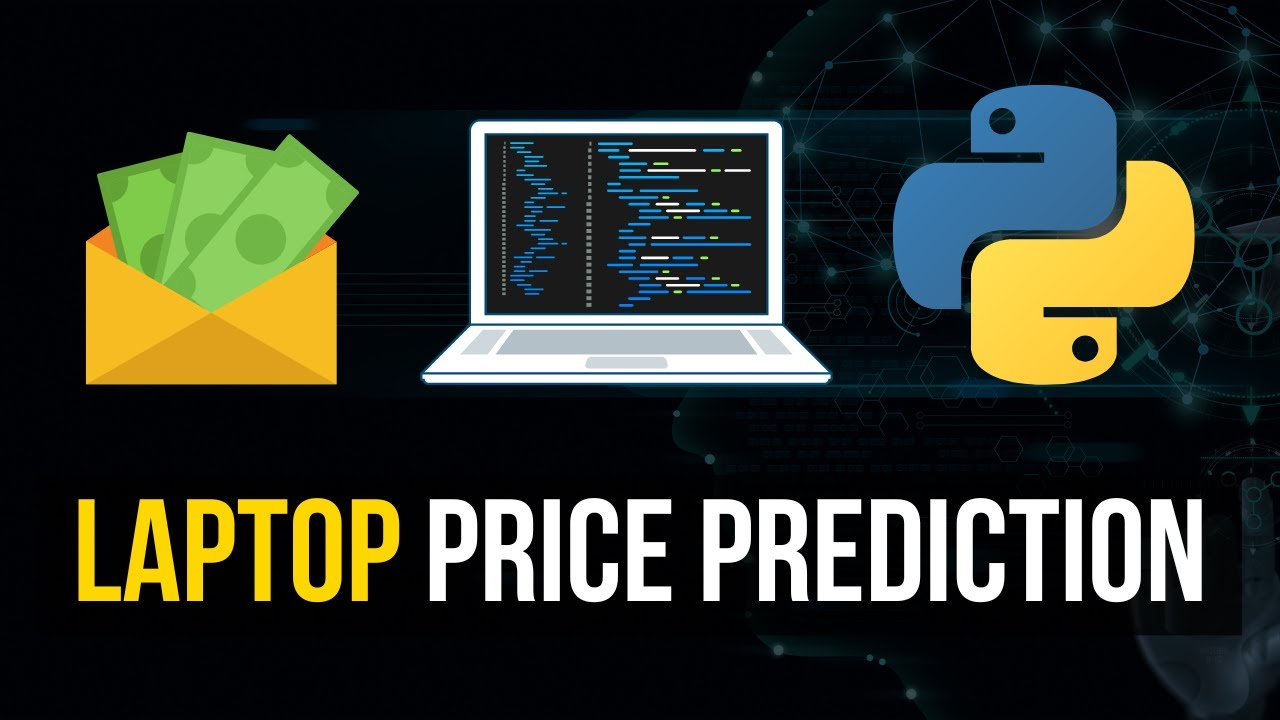




**Importing Essential Libraries**

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
import joblib

**Loading Dataset**

In [ ]:
laptop_data = pd.read_csv('/content/laptop_data.csv')

In [ ]:
laptop_data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
laptop_data.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


**Checking for Data Type and Missing Values**

In [ ]:
laptop_data.dtypes

Unnamed: 0            int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [ ]:
laptop_data.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

**Dropping Index Column**

In [ ]:
laptop_data.drop(['Unnamed: 0'],axis=1,inplace=True)

**Data Visualization**

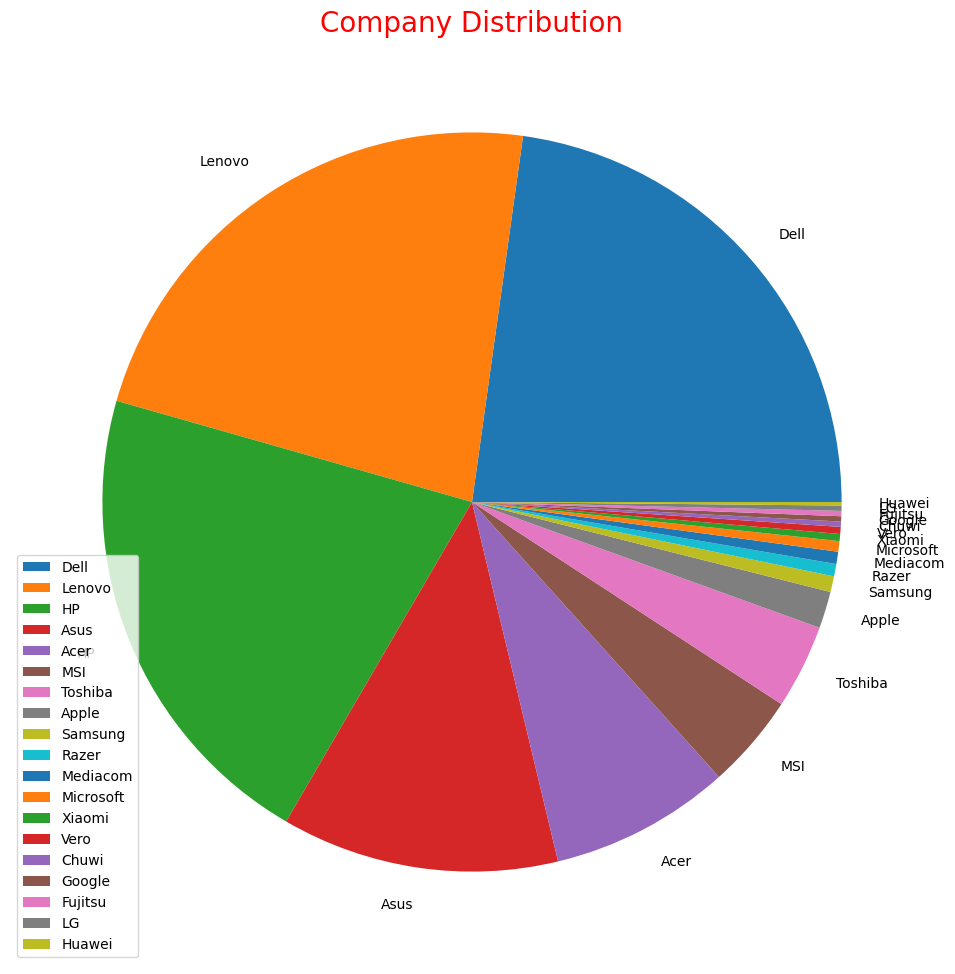

In [ ]:
company = laptop_data['Company'].value_counts()

plt.figure(figsize=(20,12))
plt.pie(company,labels=company.index)
plt.legend(loc='lower left')

plt.title('Company Distribution',color='red',size=20)
plt.show()

<Axes: xlabel='Ram', ylabel='count'>

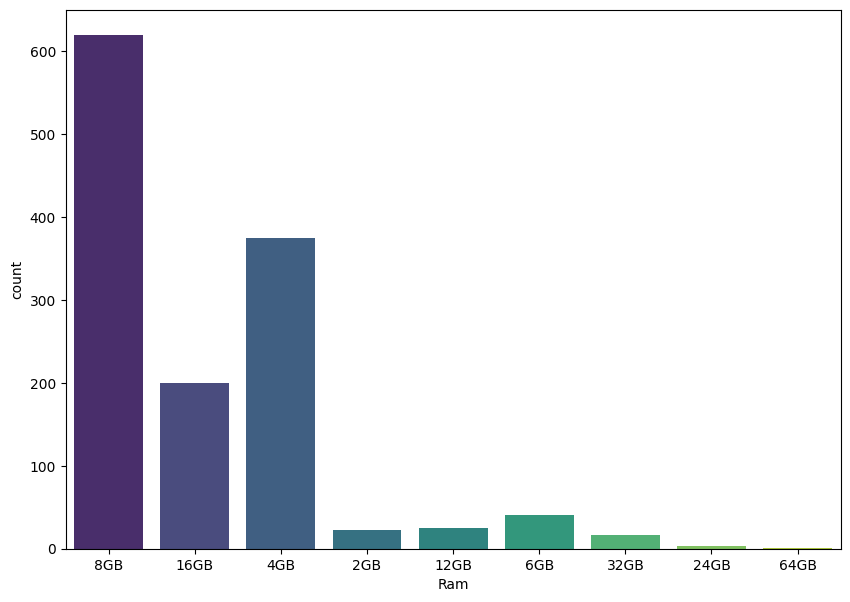

In [ ]:
warnings.filterwarnings('ignore', category=FutureWarning)

plt.figure(figsize=(10,7))
sns.countplot(x='Ram', data=laptop_data, palette='viridis')

Text(0.5, 1.0, 'OS vs Price Graph')

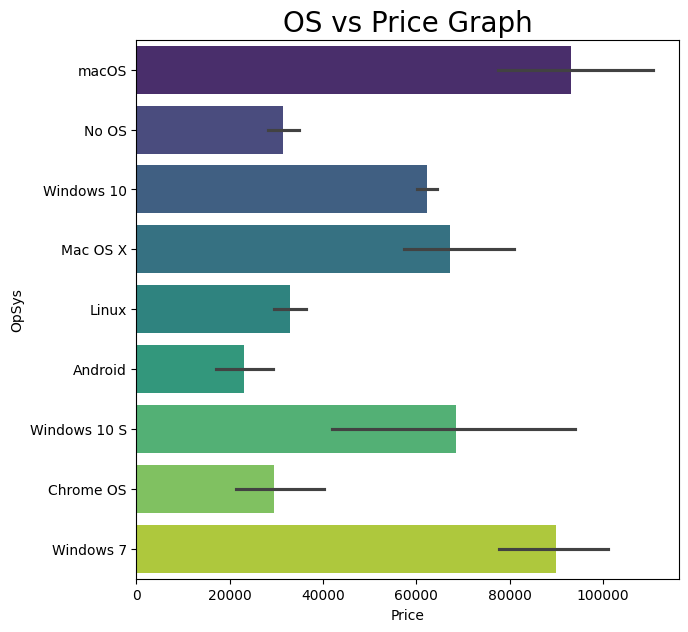

In [ ]:
plt.figure(figsize=(7,7))
sns.barplot(y='OpSys', x='Price', data=laptop_data, palette='viridis')
plt.title('OS vs Price Graph',size=20)

In [ ]:
types = laptop_data['TypeName'].value_counts()

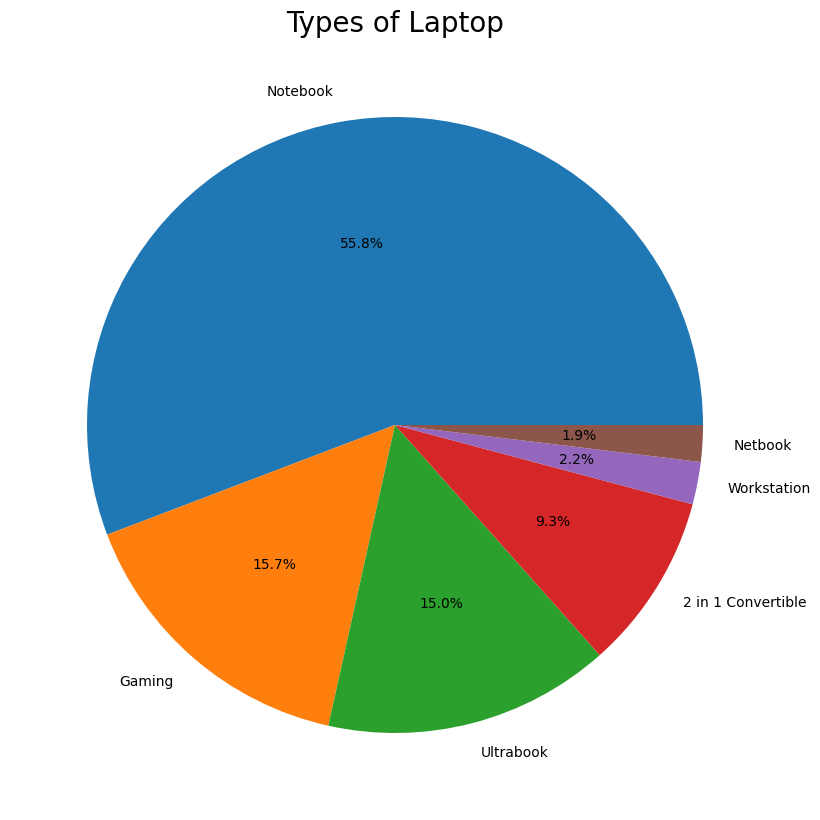

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(types,labels=types.index,autopct='%1.1f%%')
plt.title('Types of Laptop',fontsize=20)
plt.show()

In [ ]:
laptop_data['Weight'] = laptop_data['Weight'].str.replace('kg','')

laptop_data['Ram'] = laptop_data['Ram'].str.replace('GB','')

In [ ]:
laptop_data.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [ ]:
laptop_data['Ram'] = laptop_data['Ram'].astype(float)

laptop_data['Weight'] = laptop_data['Weight'].astype(float)

**Splitting into Training and Testing Data**

In [ ]:
x = laptop_data.drop(['Price'],axis=1)

y = laptop_data['Price']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

**Model Creation and Feature Engineering through Pipeline**

In [ ]:
numeric_processor = Pipeline(
                    [('scaler',StandardScaler()),
                    ('pca',PCA(n_components=2))])

numeric_processor

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2))])

In [ ]:
categorical_processor = Pipeline(
                        [('encode',OneHotEncoder(handle_unknown='ignore'))])

categorical_processor

Pipeline(steps=[('encode', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
combine = ColumnTransformer(
          [('numeric',numeric_processor,['Inches','Ram','Weight']),
           ('categorical',categorical_processor,['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys'])]
)

combine

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('pca', PCA(n_components=2))]),
                                 ['Inches', 'Ram', 'Weight']),
                                ('categorical',
                                 Pipeline(steps=[('encode',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Company', 'TypeName', 'ScreenResolution',
                                  'Cpu', 'Memory', 'Gpu', 'OpSys'])])

In [ ]:
pipe_LR = Pipeline(
          [('preprocessor',combine),
           ('model_1',LinearRegression())]
)

pipe_LR

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=2))]),
                                                  ['Inches', 'Ram', 'Weight']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Company', 'TypeName',
                                                   'ScreenResolution', 'Cpu',
                                                   'Memory', 'Gpu',
                                                   'OpSys'])])),
                ('model_1', LinearRegression())])

In [ ]:
pipe_DT = Pipeline(
          [('preprocessor',combine),
           ('model_2',DecisionTreeRegressor(random_state=42))]
)

pipe_DT

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=2))]),
                                                  ['Inches', 'Ram', 'Weight']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Company', 'TypeName',
                                                   'ScreenResolution', 'Cpu',
                                                   'Memory', 'Gpu',
                                                   'OpSys'])])),
                ('model_2', DecisionTreeRegressor(random_state=42))])

In [ ]:
pipe_RF = Pipeline(
          [('preprocessor',combine),
           ('model_3',RandomForestRegressor(random_state=42))]
)

pipe_RF

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=2))]),
                                                  ['Inches', 'Ram', 'Weight']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Company', 'TypeName',
                                                   'ScreenResolution', 'Cpu',
                                                   'Memory', 'Gpu',
                                                   'OpSys'])])),
                ('model_3', RandomForestRegressor(random_state=42))])

**Fit and Train each Model**

In [ ]:
pipe_LR.fit(x_train,y_train)

y_pred_LR = pipe_LR.predict(x_test)

In [ ]:
pipe_DT.fit(x_train,y_train)

y_pred_DT = pipe_DT.predict(x_test)

In [ ]:
pipe_RF.fit(x_train,y_train)

y_pred_RF = pipe_RF.predict(x_test)

**Performance Evaluation**

In [ ]:
score_LR = r2_score(y_test,y_pred_LR)
score_LR

0.8238274131155817

In [ ]:
score_DT = r2_score(y_test,y_pred_DT)
score_DT

0.638544537742433

In [ ]:
score_RF = r2_score(y_test,y_pred_RF)
score_RF

0.7918926644100976

**Performance Comparison**

Text(0.5, 1.0, 'Performance comparison graph')

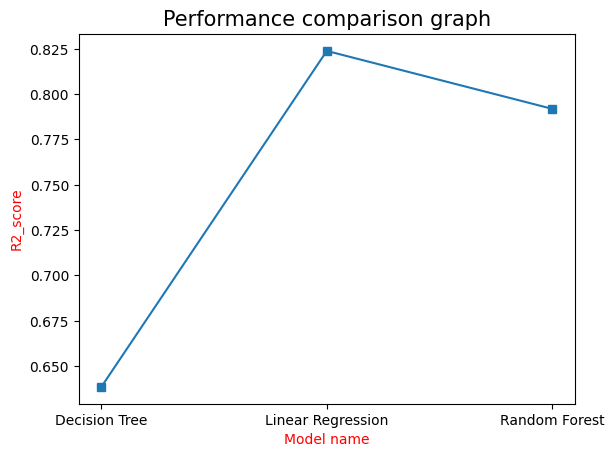

In [ ]:
models = ['Decision Tree','Linear Regression','Random Forest']

r2_scores = [score_DT,score_LR,score_RF]

plt.plot(models,r2_scores,marker='s')
plt.xlabel('Model name',color='r')
plt.ylabel('R2_score',color='r')
plt.title('Performance comparison graph',size=15)



**Hyperparameter Tuning** (Implemented in a new model)

In [ ]:
df = pd.read_csv('/content/laptop_data.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
encodes = LabelEncoder()
categorical_features = ['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']

for i in df.columns:
  if i in categorical_features:
    df[i] = encodes.fit_transform(df[i])

df['Weight'] = df['Weight'].str.replace('kg','')
df['Ram'] = df['Ram'].str.replace('GB','')
df['Ram'] = df['Ram'].astype(float)
df['Weight'] = df['Weight'].astype(float)

In [ ]:
x = df.drop(['Price'],axis=1)
y = df['Price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
model = RandomForestRegressor()

In [ ]:
hyperparameters = {'n_estimators' : [100,200,300],
                   'max_depth' : [None,10,20],
                   'max_features': ['sqrt', 'log2'],
                   'bootstrap': [True, False],
                   'random_state' : [0,1,42]}

grid_search = GridSearchCV(estimator = model,
                           param_grid = hyperparameters,
                           scoring = 'r2',
                           cv = 5,
                           n_jobs = -1)

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300],
                         'random_state': [0, 1, 42]},
             scoring='r2')

**Checking for best Parameters and R2 score**

In [ ]:
grid_search.best_score_

0.8418766780775802

In [ ]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'random_state': 42}

**Creating a new Tuned Model**

In [ ]:
final_model = RandomForestRegressor(n_estimators=200, bootstrap=False, max_features='sqrt', random_state=42, max_depth=20)
final_model.fit(x_train,y_train)

**Saving the Result**

In [ ]:
joblib.dump(final_model,'laptop_result')

['laptop_result']